IMPORT PACKAGES

In [2]:
#Packages for linear regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

#Packages for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#Packages for GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor



RETRIEVING DATA AND CLEANING

In [3]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(filename, header=0)

In [4]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1562.0,2011.820743,3.419787,2005.000000,2009.000000,2012.000000,2015.000000,2017.000000
Life Ladder,1562.0,5.433676,1.121017,2.661718,4.606351,5.332600,6.271025,8.018934
Log GDP per capita,1535.0,9.220822,1.184035,6.377396,8.310665,9.398610,10.190634,11.770276
Social support,1549.0,0.810669,0.119370,0.290184,0.748304,0.833047,0.904329,0.987343
Healthy life expectancy at birth,1553.0,62.249887,7.960671,37.766476,57.299580,63.803192,68.098228,76.536362
Freedom to make life choices,1533.0,0.728975,0.145408,0.257534,0.633754,0.748014,0.843628,0.985178
Generosity,1482.0,0.000079,0.164202,-0.322952,-0.114313,-0.022638,0.094649,0.677773
Perceptions of corruption,1472.0,0.753622,0.185538,0.035198,0.697359,0.808115,0.880089,0.983276
Positive affect,1544.0,0.708969,0.107644,0.362498,0.621471,0.717398,0.800858,0.943621
Negative affect,1550.0,0.263171,0.084006,0.083426,0.204116,0.251798,0.311515,0.704590


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

In [7]:
percentage = 0.3
num_rows = df.shape[0]

indices = np.random.choice(df.index, size=int(percentage*num_rows), replace=False)
df_subset=df.loc[indices]
print(df_subset)

           country  year  Life Ladder  Log GDP per capita  Social support  \
413          Egypt  2015     4.762538            9.219856        0.729744   
874          Malta  2010     5.773875           10.251666        0.908322   
1028       Nigeria  2015     4.932915            8.643057        0.811648   
661          Italy  2011     6.057086           10.500876        0.913309   
60       Australia  2013     7.364169           10.667095        0.928205   
...            ...   ...          ...                 ...             ...   
1263  South Africa  2015     4.887326            9.427493        0.898096   
496        Germany  2016     6.873763           10.697845        0.906029   
733         Kosovo  2013     6.125758            9.061113        0.720750   
336        Croatia  2011     5.385373            9.938097        0.789739   
1029       Nigeria  2016     5.219568            8.600566        0.804767   

      Healthy life expectancy at birth  Freedom to make life choices  \
413

In [8]:
#Figure out Countries with the highest repetition to avoid outliers and imbalance 
num_examples=df['country'].value_counts()
num_examples

country
Azerbaijan    12
Bangladesh    12
Armenia       12
Argentina     12
Chile         12
              ..
Guyana         1
Cuba           1
Oman           1
Suriname       1
Swaziland      1
Name: count, Length: 164, dtype: int64

In [9]:
df.isnull().values.any()

np.True_

In [10]:
#Count the number of empty or null values in each column
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [11]:
num_rows = df['GINI index (World Bank estimate)'].count()
print(num_rows)

583


In [12]:
df.shape

(1562, 19)

In [13]:
#drop GINI index (World Bank estimate)
df.drop(columns = ['GINI index (World Bank estimate)'], inplace = True)

In [14]:
#drop country column
df.drop(columns = ['country'], inplace = True)

In [15]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate), averag

In [16]:
#I will attempt to find the mean of Healthy life expectancy at birth
mean_HLE=df['Healthy life expectancy at birth'].mean()
print('Healthy life expectancy at birth:'+str(mean_HLE))
df['Healthy life expectancy at birth'].fillna(value=mean_HLE, inplace=True)
np.sum(df['Healthy life expectancy at birth'].isnull(),axis=0)

Healthy life expectancy at birth:62.24988743079202


C:\Users\ikedi\AppData\Local\Temp\ipykernel_20564\3889259205.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Healthy life expectancy at birth'].fillna(value=mean_HLE, inplace=True)


np.int64(0)

In [17]:
ctp=['Generosity', 'Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'gini of household income reported in Gallup, by wp5-year', 'GINI index (World Bank estimate), average 2000-15']
# Iterate over each column and perform the operations
for col in ctp:
    mean_value = df[col].mean()
    print(f"Mean value for {col}: {mean_value}")
    df[col].fillna(value=mean_value, inplace=True)

# Verify if missing values were filled
nan_count = np.sum(df[ctp].isnull(), axis=0)
print("Missing values count after filling:")
print(nan_count)

Mean value for Generosity: 7.918068556005372e-05
Mean value for Log GDP per capita: 9.220822267882737
Mean value for Social support: 0.810669194348612
Mean value for Freedom to make life choices: 0.7289745885525114
Mean value for Perceptions of corruption: 0.7536222733043477
Mean value for Positive affect: 0.7089688175952072
Mean value for Negative affect: 0.26317073169032257
Mean value for Confidence in national government: 0.4802072749436117
Mean value for Democratic Quality: -0.12661689876563623
Mean value for Delivery Quality: 0.004946614272465853
Mean value for gini of household income reported in Gallup, by wp5-year: 0.44520446127385904
Mean value for GINI index (World Bank estimate), average 2000-15: 0.3869481859018759
Missing values count after filling:
Generosity                                                  0
Log GDP per capita                                          0
Social support                                              0
Freedom to make life choices              

C:\Users\ikedi\AppData\Local\Temp\ipykernel_20564\3183805458.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=mean_value, inplace=True)


In [18]:
import scipy.stats as stats
#passing two percentage cutoffs as a list to the limits parameter, and all the column values below the specified lower percentile cutoff, as well as all the values above the upper cutoff, will be replaced with the corresponding percentile value.
df['gini of household income reported in Gallup, by wp5-year'] = stats.mstats.winsorize(df['gini of household income reported in Gallup, by wp5-year'], limits=[0.01, 0.01])
df.head(15)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.386948,0.445204
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.386948,0.441906
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.386948,0.327318
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.386948,0.336764
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.386948,0.344540
5,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,0.386948,0.304368
6,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,0.386948,0.413974
7,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,0.386948,0.596918
8,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,0.386948,0.418629
9,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.126617,0.004947,1.454051,0.546283,0.386948,0.286599


IMPLEMENT MODEL

In [19]:
y=df['Healthy life expectancy at birth']
X=df.drop('Healthy life expectancy at birth', axis=1)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 1562

Number of Features:16
['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [20]:
X_train, X_test, y_train, y_test= train_test_split (X,y, test_size=0.30, random_state=123)
print (X_train.shape)
print (X_test.shape)
nan_count=X_train.isnull().sum()
print(nan_count)

(1093, 16)
(469, 16)
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI index (World Bank estimate), average 2000-15           0
gini of household income reported in Gallup, by w

LINEAR REGRESSION MODEL

In [21]:
lr_model=LinearRegression()

In [22]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [23]:
lr_pred=lr_model.predict(X_test)

In [24]:
lr_rmse=root_mean_squared_error(y_test, lr_pred)

In [25]:
lr_r2=r2_score(y_test, lr_pred)

In [26]:
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))

[LR] Root Mean Squared Error: 3.984112107050669


In [27]:
print('[LR] R2 Score: {0}'.format(lr_r2))

[LR] R2 Score: 0.7693547536778157


In [107]:
#Feature Importance to improve model performance
result = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
permImp_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(permImp_df)

                                              Feature  Permutation Importance
2                                  Log GDP per capita                0.515140
13  Standard deviation/Mean of ladder by country-year                0.154796
12       Standard deviation of ladder by country-year                0.122248
11                                   Delivery Quality                0.078631
14  GINI index (World Bank estimate), average 2000-15                0.039406
15  gini of household income reported in Gallup, b...                0.024730
9                   Confidence in national government                0.011029
7                                     Positive affect                0.008154
1                                         Life Ladder                0.007140
0                                                year                0.005956
8                                     Negative affect                0.003632
6                           Perceptions of corruption           

RANDOM FOREST

In [28]:
print('Begin random forest Implementation...')
rf_model= RandomForestRegressor(max_depth= 30, n_estimators= 300)
rf_model.fit(X_train, y_train)
print('Success')

Begin random forest Implementation...
Success


In [29]:
rf_pred= rf_model.predict(X_test)
rf_rmse=root_mean_squared_error(y_test, rf_pred)
rf_r2=r2_score(y_test, rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2 score: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 2.4221265186750283
[RF] R2 score: 0.9147537945213465


In [30]:
#Feature Importance to improve model performance
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
permImp_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(permImp_df)


                                              Feature  Permutation Importance
2                                  Log GDP per capita                1.056702
14  GINI index (World Bank estimate), average 2000-15                0.178011
10                                 Democratic Quality                0.045812
11                                   Delivery Quality                0.045388
1                                         Life Ladder                0.035662
0                                                year                0.015086
7                                     Positive affect                0.014752
5                                          Generosity                0.008805
12       Standard deviation of ladder by country-year                0.008076
3                                      Social support                0.007519
6                           Perceptions of corruption                0.007426
8                                     Negative affect           

GRADIENT BOOSTED DECISION

In [31]:
print('Begin GBDT Implementation...')

# Creating the  model object and fitting the model to training data 

gbdt_model= GradientBoostingRegressor(max_depth=3, n_estimators=300)
gbdt_model.fit (X_train, y_train)

print('Success')

Begin GBDT Implementation...
Success


In [41]:
gbdt_pred= gbdt_model.predict(X_test)
gbdt_rmse=root_mean_squared_error(y_test, gbdt_pred)
gbdt_r2=r2_score(y_test, gbdt_pred)
           
print([GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))              

[GBDT] Root Mean Squared Error: 2.2512482913657936
[GBDT] R2: 0.9263575548693079


In [101]:
from sklearn.metrics import mean_absolute_error
print('[GBDT] Mean Absolute Error:', str(mean_absolute_error(gbdt_pred, y_test)))

[GBDT] Mean Absolute Error: 1.6052860141268344


In [33]:
#Feature Importance to improve model performance
result = permutation_importance(gbdt_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
permImp_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(permImp_df)


                                              Feature  Permutation Importance
2                                  Log GDP per capita                0.664749
14  GINI index (World Bank estimate), average 2000-15                0.228137
11                                   Delivery Quality                0.076821
10                                 Democratic Quality                0.048850
1                                         Life Ladder                0.017935
7                                     Positive affect                0.012636
0                                                year                0.011033
6                           Perceptions of corruption                0.007932
9                   Confidence in national government                0.006913
12       Standard deviation of ladder by country-year                0.005288
5                                          Generosity                0.005064
4                        Freedom to make life choices           

In [34]:
#TRYING OUT DIFFERENT GRADIENT BOOSTING MODELS

XGBOOST <EXTREME GRADIENT BOOSTING>

In [35]:
!pip  install xgboost


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from xgboost import XGBRegressor

In [71]:
xgb_model=XGBRegressor(n_estimators=1000,learning_rate= 0.025, n_jobs=4)
xgb_model.fit(X_train, y_train, eval_set= [(X_test, y_test)],  verbose= False)
xgb_model.set_params(early_stopping_rounds= 7)
xgb_pred= xgb_model.predict (X_test)


In [72]:
xgb_rmse= root_mean_squared_error(xgb_pred, y_test)
print('[XBG] Root Mean Squared Error: {0}'. format (xgb_rmse))
xgb_r2= r2_score(xgb_pred, y_test)
print ('[XGB] Root Squared: {0}'.format(xgb_r2))

[XBG] Root Mean Squared Error: 2.0074360194406733
[XGB] Root Squared: 0.9354633135797662


In [74]:
print ('[XGB] Mean Absolute Error:', str(mean_absolute_error(y_test, xgb_pred)))

[XGB] Mean Absolute Error: 1.3594904496252163


VISUALIZATION AND COMPARISON

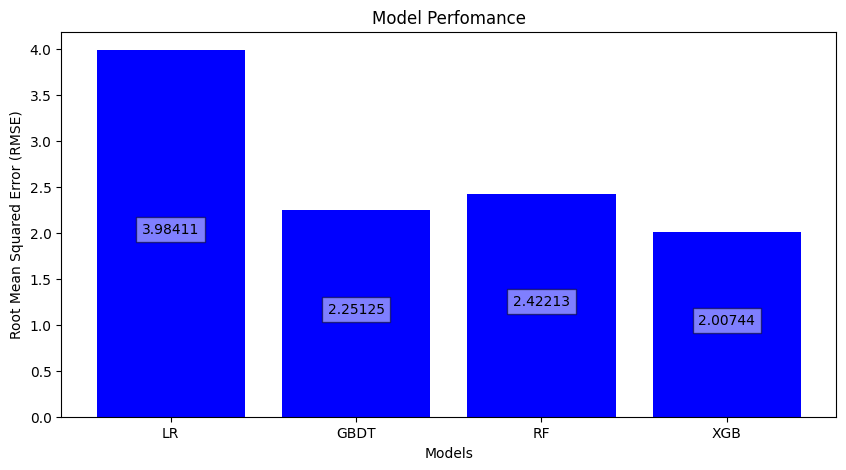

In [99]:
#COMPARING RMSE VALUES ACROSS MODELS

def addlabels (x,y):
    for i in range (len(x)):
        plt.text(i, y[i]/2, f'{y[i]:.5f}', ha= "center",
            bbox=dict(facecolor="white", alpha= 0.5))

if __name__== '__main__': 
    x= ['LR','GBDT', 'RF', 'XGB']
    y= [lr_rmse, gbdt_rmse, rf_rmse, xgb_rmse]
    plt.figure(figsize =(10,5))
    plt.bar(x,y, color='blue')
    addlabels(x,y)
    plt.title('Model Perfomance')
    plt.xlabel('Models')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.show 
    
    


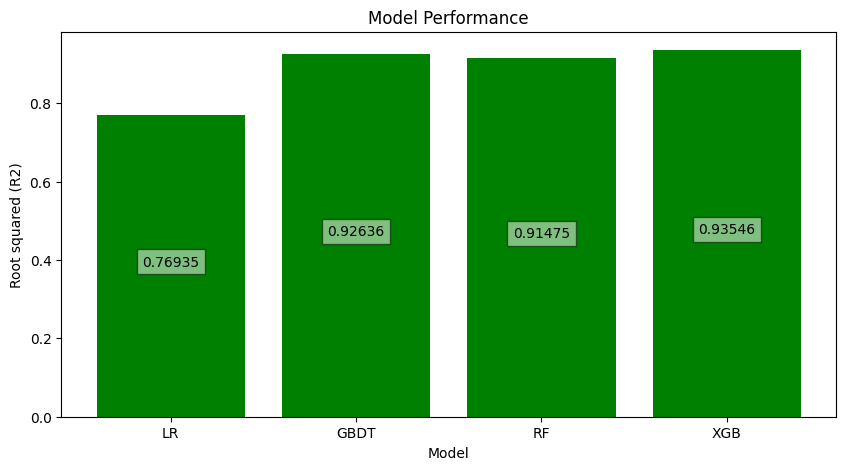

In [100]:
 #COMPARING R2 VALUES ACROSS MODELS

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2,f'{y[i]:.5f}', ha = 'center',
                 bbox = dict(facecolor = 'white', alpha = .5))
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x =['LR', 'GBDT', 'RF', 'XGB']
    y = [lr_r2, gbdt_r2, rf_r2, xgb_r2]
     
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
   
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'green')
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Model Performance")
     
    # giving X and Y labels
    plt.xlabel("Model")
    plt.ylabel("Root squared (R2)")
     
    # visualizing the plot
    plt.show()

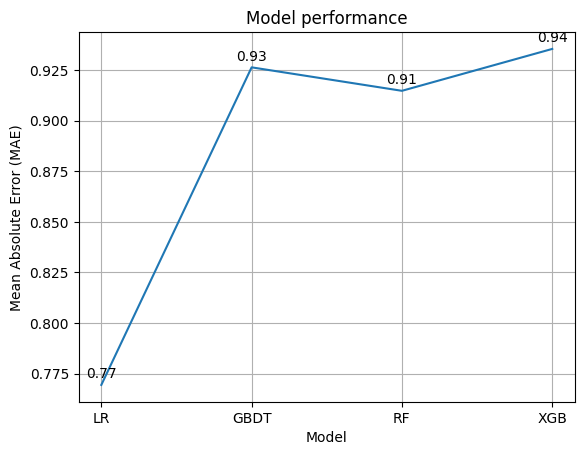

In [106]:
#COMPARING MAE VALUES ACROSS MODELS
from matplotlib import pyplot as plt

fig = plt.figure()
plot = fig.add_subplot(111)

x = ['LR', 'GBDT', 'RF', 'XGB']
y = [lr_r2, gbdt_r2, rf_r2, xgb_r2]

plt.plot(x,y)
for i,j in zip(x,y):
   plot.annotate(f'{j:.2f}', xy=(i, j), xytext=(0, 5), textcoords='offset points', ha='center')

plt.title('Model performance')
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")

plt.grid()
plt.show()
